In [ ]:
"""Building a Molecular Mechanics Force Field"""

__authors__ = ["Olaseni Sode","Paul Nerenberg"]
__email__   = ["osode@calstatela.edu","pnerenb@calstatela.edu"]
__date__      = "2022-10-13"

# Building a Force Field

In this exercise you will examine a simple fixed-charge force field (GAFF2) for a simple molecule (ethane) and see how it is “coded” into an XML file for OpenMM.  You will then create an analogous XML file for simulating a similar molecule with OpenMM.

In [1]:
# import the python modules that we will use
import psi4
import numpy as np
# enable the output of plotting commands to be displayed in a Jupyter notebook
%matplotlib inline
import matplotlib.pyplot as plt

#### A brief recap of force fields

As we discussed, a great many force fields have used the following functional form to describe intra- and intermolecular interactions:

$$ U = U_{\rm bond}+U_{\rm angle}+U_{\rm torsion}+U_{\rm elec}+U_{\rm vDW}$$

where for individual bonds (between two atoms), angles (between atoms separated by two bonds), torsions (between atoms separated by three bonds), or atom pairs separated by three bonds/nonbonded atom pairs:

$$U_{\rm bond} = \frac{1}{2}k_{l}(l-l_{eq})^2,$$
$$U_{\rm angle} = \frac{1}{2}k_{\theta}(\theta - \theta_{eq})^2,$$
$$U_{\rm torsion} = \sum_n^{n_{\rm max}} U_n [1 + (\cos n\phi - \gamma_n)],$$
$$U_{\rm elec} = \frac{k_e q_i q_j}{r_{ij}},$$  
$$U_{\rm vDW} = 4\epsilon_{ij} \left [ \left ( \frac{\sigma_{ij}}{r_{ij}}\right )^12 - \left (\frac{\sigma_{ij}}{r_{ij}}\right )^6 \right ].$$

## 1. Force Field for Ethane

To help make sense of these equations let’s examine ethane (${\rm C_2H_6}$), which is perhaps the simplest molecule that requires all of these terms for accurate modeling.

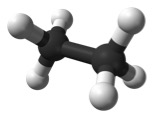

From the 3D structure above (see also the [ethane PDB](#Ethane-PDB) at the end of this notebook), you can reason that in ethane there are two types of bonds (C-C and C-H), two types of angles (H-C-H and H-C-C), and one torsion (H-C-C-H).  By examining the symmetry of this molecule, it is reasonable to assume that the partial atomic charges ($q_i$) and van der Waals parameters ($\epsilon_i$ and $\sigma_i$) will be the same for both carbon atoms and likewise for all six hydrogen atoms.  The GAFF2 force field assigns the following SI parameters for all of these interactions:

| Interaction | Force Constants | Equilibrium |
| :-- | :-- | :-- |
| C-C bond | $k_r =$ 1.946 $\times 10^5$ kJ/mol⋅nm$^2$ | $r_{eq} = $ 0.1538 nm |
| C-H bond | $k_r =$ 3.146 $\times 10^5$ kJ/mol⋅nm$^2$ | $r_{eq} = $ 0.1097 nm |
| H-C-H angle | $k_{\theta} =$ 326.0 kJ/mol⋅rad$^2$ | $\theta_{eq} = $ 1.878 rad |
| H-C-C angle | $k_{\theta} =$ 391.8 kJ/mol⋅rad$^2$ | $\theta_{eq} = $ 1.916 rad |
| H-C-C-H torsion | $U_{3} =$ 0.5021 kJ/mol⋅rad$^2$ | $\gamma_{3} = $ 0 rad | 

| Interaction | Partial Charges | Sigma | Epsilon |
| :-- | :-- | :-- | :-- |
| C atom (nonbonded) | $q_C =$ -0.0951e | $\sigma_{C} = $ 0.3398 nm | $\epsilon_C$ = 0.4510 kJ/mol |
| H atom (nonbonded) | $q_H =$ 0.0317e | $\sigma_{H} = $ 0.2600 nm | $\epsilon_H$ = 0.0870 kJ/mol |

<span style="color:red">Note the units for all of these values.</span>

If you examine the cell below (which contains the `ethane.gaff2.xml` code), you will first see that we define two types of atoms (0 for the C atoms and 1 for the H atoms).  The next section describes which types apply to the atoms in ethane.  In addition, much like a PDB file, this XML file conveys connectivity/topology information by describing which atoms are bonded to each other.  Finally, you should see multiple sections that convey the force field information given above.

#### ethane.gaff2.xml

    <ForceField>
     <AtomTypes>
      <Type name="0" class="c3" element="C" mass="12.01078"/>
      <Type name="1" class="hc" element="H" mass="1.007947"/>
     </AtomTypes>
     <Residues>
      <Residue name="ETH">
       <Atom name="C1" type="0"/>
       <Atom name="H11" type="1"/>
       <Atom name="H12" type="1"/>
       <Atom name="H13" type="1"/>
       <Atom name="C2" type="0"/>
       <Atom name="H21" type="1"/>
       <Atom name="H22" type="1"/>
       <Atom name="H23" type="1"/>
       <Bond atomName1="C1" atomName2="H11"/>
       <Bond atomName1="C1" atomName2="H12"/>
       <Bond atomName1="C1" atomName2="H13"/>
       <Bond atomName1="C1" atomName2="C2"/>
       <Bond atomName1="C2" atomName2="H21"/>
       <Bond atomName1="C2" atomName2="H22"/>
       <Bond atomName1="C2" atomName2="H23"/>
      </Residue>
     </Residues>
     <HarmonicBondForce>
      <Bond class1="c3" class2="c3" length="0.15380" k="194572.74"/>
      <Bond class1="c3" class2="hc" length="0.10970" k="314568.76"/>
     </HarmonicBondForce>
     <HarmonicAngleForce>
      <Angle class1="c3" class2="c3" class3="hc" angle="1.91637152" k="391.756288"/>
      <Angle class1="hc" class2="c3" class3="hc" angle="1.87762521" k="326.01728"/>
     </HarmonicAngleForce>
     <PeriodicTorsionForce>
      <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>
     </PeriodicTorsionForce>
     <NonbondedForce coulomb14scale="0.833333" lj14scale="0.5">
      <Atom type="0" charge="-0.094100" sigma="0.3397710" epsilon="0.4510352"/>
      <Atom type="1" charge="0.031700" sigma="0.2600177" epsilon="0.0870272"/>
     </NonbondedForce>
    </ForceField>

**References:**
The above force field parameters are taken from the GAFF2 dataset. Here are two papers if you are interested in learning more about this approach. [2004](https://onlinelibrary.wiley.com/doi/10.1002/jcc.20035), [2006](https://www.sciencedirect.com/science/article/pii/S1093326305001737?via%3Dihub).

#### Setup ethane molecule

Begin to setup your molecule by loading the geometry into Psi4. In the cell below a geometry is already given to you in the Z-matrix format, but you could just as easily use the Cartesian format. Next you will perform an initial energy calculation at the current geometry, followed by a geometry optimization and then a vibrational frequency calculation. All of the calculation will be perfomed at the `scf/cc-pVDZ` level of theory and basis set.

In [ ]:
# set the molecule name for your files and plots
molecule_name = "ethane"

# enter starting coordinates in z-matrix format
geometry = """
C
C 1 1.5307
H 1 1.0936 2 111.3578
H 1 1.0936 2 111.3578 3 120
H 1 1.0936 2 111.3578 3 240
H 2 1.0936 1 111.3578 3 60
H 2 1.0936 1 111.3578 3 180
H 2 1.0936 1 111.3578 3 300
"""
molecule = psi4.geometry(geometry)

#### Energy calculation

In [ ]:
# set the amount of memory and processes
psi4.set_memory('2 GB')
psi4.set_num_threads(2)

# calculate the initial energy of the molecule using the HF method
psi4.set_output_file(molecule_name + '_energy_initial.dat', False)
E = psi4.energy('scf/cc-pVDZ')

#print the energy out to the notebook
print('The energy is: ', E)

#### Geometry optimization

In [ ]:
psi4.set_output_file(molecule_name + '_optimization.dat', False)
psi4.set_options({'g_convergence': 'gau_tight'}) # this forces the optimizer to get close to the minimum
energy, wfn = psi4.optimize('scf/cc-pVDZ', return_wfn=True, dertype='gradient')

#### Vibrational frequency calculation

In [ ]:
psi4.set_output_file(molecule_name + '_vibration.dat', False)
energy, wfn = psi4.frequency('scf/cc-pVDZ', return_wfn=True, dertype='hessian')

#### View output file in WebMO

You will probably need to visualize the vibrational calculation, and the easiest way to do this is WebMO. You can log into the [WebMO demo server](https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi) and import a job (New Job --> Import Job). 

**But before doing this, execute the following code cell to make sure the following lines are added to your file ending in `_vibration.dat` so that the file will be correctly imported by WebMO.**

In [ ]:
beg_line = """
-----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6 release\n\n

"""
end_line = "\n*** Psi4 exiting successfully. Buy a developer a beer!\n"

with open(molecule_name + '_vibration.dat', 'r+') as file:
    content = file.read()
    file.seek(0)
    file.write(beg_line + content + end_line)
    file.close()

**Question 1: <span style="color:red">From the WebMO output, what are the optimized equilibirum bonds? Use the table below to indicate your responses.</span>**

**Answer:**

| Interaction | Equilibrium values (nm) |
| :-- | :-- |
| C-C bond |  |
| C-H bond |  |  
| H-C-H angle |  |  
| H-C-C angle |  | 


**Question 2: <span style="color:red">From the WebMO output, can you tell what vibrational frequencies correspond to what bonds, angles or torsional motions? Use the table below to indicate your responses.</span>**

**Answer:**

| Interaction | Frequencies (cm$^{-1}$) |
| :-- | :-- |
| C-C bond |  |
| C-H bond |  |  
| H-C-H angle |  |  
| H-C-C angle |  | 
| H-C-C-H torsion |  | 


#### Convert force constants
In the Psi4 output file, you will see the force constants for each vibrational frequency in units of mdyne angstrom$^{-1}$. However, the units for molecular mechanics force fields are typically in kcal mol$^{-1}$ angstrom$^{-2}$ or kJ mol$^{-1}$ nm$^{-2}$ and kcal mol$^{-1}$ radians$^{-2}$ or kJ mol$^{-1}$ radians$^{-2}$.

For OpenMM, the units required are in kJ mol$^{-1}$. The following conversion factors are useful for converting from force constant units in electronic structure packages (like Psi4) to units in molecular dynamics software packages (like OpenMM). 

$${\rm 1\ \frac{mdyne}{\unicode{x212B}}  = 144.67\ \frac{kcal}{\unicode{x212B}^{2}}} $$

and

$${\rm 1\ \frac{mdyne}{\unicode{x212B}}  = 143.92\ \frac{kcal}{rad^{2}}} $$

The conversion factor from mdynes angstrom$^{-1}$ to kcal mol$^{-1}$ angstrom$^{-2}$

**Question 3: <span style="color:red">From the Psi4 output, can you convert the force constants for each interaction into units of kJ mol$^{-1}$ nm$^{-2}$? Use the table below to indicate your responses.</span>**

**Answer:**

| Interaction | Force constants (kJ mol$^{-1}$ nm$^{-2}$ <br> or kJ mol$^{-1}$ rad$^{-2}$ ) |
| :-- | :-- |
| C-C bond |  |
| C-H bond |  |  
| H-C-H angle |  |  
| H-C-C angle |  | 
| H-C-C-H torsion |  | 

**Question 4: <span style="color:red">How do your force constants and equilibrium values compare to the ethane force field file, [`ethane.gaff2.xml`](#ethane.gaff2.xml)? Try your best to explain why there are discrepancies between your results and the GAFF2 results, if they exist.</span>**

**Answer:**


## 2. Force Field for Halogen Butane Molecule

Next you will build your own [custom force field xml file](#Custom-Template-XML-File) from a [`butane.gaff2.xml`](#butane.gaff2.xml) template. However you will use the molecule assigned to you on Canvas which is some halogenated butane molecule. Start by building the molecule in [WebMO](https://www.webmo.net/demoserver/cgi-bin/webmo/login.cgi).

#### butane.gaff2.xml

    <ForceField>
     <AtomTypes>
      <Type name="0" class="c3" element="C" mass="12.01078"/>
      <Type name="1" class="c3" element="C" mass="12.01078"/>
      <Type name="2" class="hc" element="H" mass="1.007947"/>
      <Type name="3" class="hc" element="H" mass="1.007947"/>
     </AtomTypes>
     <Residues>
      <Residue name="NBU">
       <Atom name="C1" type="0"/>
       <Atom name="H11" type="2"/>
       <Atom name="H12" type="2"/>
       <Atom name="H13" type="2"/>
       <Atom name="C2" type="1"/>
       <Atom name="H21" type="3"/>
       <Atom name="H22" type="3"/>
       <Atom name="C3" type="1"/>
       <Atom name="H31" type="3"/>
       <Atom name="H32" type="3"/>
       <Atom name="C4" type="0"/>
       <Atom name="H41" type="2"/>
       <Atom name="H42" type="2"/>
       <Atom name="H43" type="2"/>
       <Bond atomName1="C1" atomName2="H11"/>
       <Bond atomName1="C1" atomName2="H12"/>
       <Bond atomName1="C1" atomName2="H13"/>
       <Bond atomName1="C1" atomName2="C2"/>
       <Bond atomName1="C2" atomName2="H21"/>
       <Bond atomName1="C2" atomName2="H22"/>
       <Bond atomName1="C2" atomName2="C3"/>
       <Bond atomName1="C3" atomName2="H31"/>
       <Bond atomName1="C3" atomName2="H32"/>
       <Bond atomName1="C3" atomName2="C4"/>
       <Bond atomName1="C4" atomName2="H41"/>
       <Bond atomName1="C4" atomName2="H42"/>
       <Bond atomName1="C4" atomName2="H43"/>
      </Residue>
     </Residues>
     <HarmonicBondForce>
      <Bond class1="c3" class2="c3" length="0.15380" k="1945727.36"/>
      <Bond class1="c3" class2="hc" length="0.10970" k="3145687.56"/>
     </HarmonicBondForce>
     <HarmonicAngleForce>
      <Angle class1="c3" class2="c3" class3="c3" angle="1.94621665" k="542.982784"/>
      <Angle class1="c3" class2="c3" class3="hc" angle="1.91637152" k="391.756288"/>
      <Angle class1="hc" class2="c3" class3="hc" angle="1.87762521" k="326.01728"/>
     </HarmonicAngleForce>
     <PeriodicTorsionForce>
      <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>
      <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.3347"/>
      <Proper class1="c3" class2="c3" class3="c3" class4="c3" 
       periodicity1="1" phase1="0.0" k1="0.4602"
       periodicity2="2" phase2="3.141593" k2="1.2134" 
       periodicity3="3" phase3="0.0" k3="0.5439"/>
     </PeriodicTorsionForce>
     <NonbondedForce coulomb14scale="0.833333" lj14scale="0.5">
      <Atom type="0" charge="-0.0932" sigma="0.3397710" epsilon="0.4510352"/>
      <Atom type="1" charge="-0.0814" sigma="0.3397710" epsilon="0.4510352"/>
      <Atom type="2" charge="0.0324" sigma="0.2600177" epsilon="0.0870272"/>
      <Atom type="3" charge="0.0387" sigma="0.2600177" epsilon="0.0870272"/>
     </NonbondedForce>
    </ForceField>

**References:**
The above force field parameters are taken from the GAFF2 dataset. Here are two papers if you are interested in learning more about this approach. [2004](https://onlinelibrary.wiley.com/doi/10.1002/jcc.20035), [2006](https://www.sciencedirect.com/science/article/pii/S1093326305001737?via%3Dihub).

#### Setup halogenated butane molecule

Don't forget to name your molecule.

In [8]:
# set the molecule name for your files and plots
molecule_name2 = "### INSERT TEXT HERE ###"

# enter starting coordinates in z-matrix format
geometry2 = """
### INSERT MOLECULE GEOMETRY HERE ###
"""

molecule2 = psi4.geometry(geometry2)

#### Energy calculation

In [9]:
# set the amount of memory and processes
psi4.set_memory('2 GB')
psi4.set_num_threads(2)

# calculate the initial energy of the molecule using the HF method
psi4.set_output_file(molecule_name2 + '_energy_initial.dat', False)
E2 = psi4.energy('scf/3-21g')

#print the energy out to the notebook
print('The energy is: ', E2)

The energy is:  -7521.198933294378


#### Geometry optimization 

In [10]:
psi4.set_output_file(molecule_name2 + '_optimization.dat', False)
psi4.optimize('scf/3-21g', dertype='gradient')

Optimizer: Optimization complete!


-7523.402707600231

#### Vibrational frequency calculation

In [11]:
psi4.set_output_file(molecule_name2 + '_vibration.dat', False)
energy2, wfn2 = psi4.frequency('scf/3-21g', return_wfn=True, dertype='hessian')

 '583.8537']


#### View output file in WebMO

Again, make sure to execute the following code cell to ensure your `_vibration.dat` file is properly imported into WebMO.

In [12]:
beg_line = """
-----------------------------------------------------------------------
          Psi4: An Open-Source Ab Initio Electronic Structure Package
                               Psi4 1.6 release\n\n

"""
end_line = "\n*** Psi4 exiting successfully. Buy a developer a beer!\n"

with open(molecule_name2 + '_vibration.dat', 'r+') as file:
    content = file.read()
    file.seek(0)
    file.write(beg_line + content + end_line)
    file.close()

**Question 5: <span style="color:red">From the WebMO output, what are the optimized equilibirum bonds for all the unique values? Use the table below to indicate your responses. The `X` and `Y` term represent the halogen atoms.</span>**

**Answer:**

| Interaction | Equilibrium values (nm) |
| :-- | :-- |  
| C-X bond |  |  
| C-C-X angle |  | 
| C-Y bond |  |  
| C-C-Y angle |  | 

**Question 6: <span style="color:red"> From the WebMO output, can you tell what vibrational frequencies correspond to what bonds or angles? Use the table below to indicate your responses. Ignore the torsional terms. The `X` and `Y` terms represent the halogen atoms.</span>**

**Answer:**

| Interaction | Frequencies (cm$^{-1}$) |
| :-- | :-- | 
| C-X bond |  |  
| C-C-X angle |  | 
| C-Y bond |  |  
| C-C-Y angle |  | 

**Question 7: <span style="color:red"> From the Psi4 output, can you convert the force constants for each interaction into units of kJ mol$^{-1}$ nm$^{-2}$ or kJ mol$^{-1}$ rad$^{-2}$? Use the table below to indicate your responses. Again, ignore the torsional terms. The `X` and `Y` terms represent the halogen atoms.</span>**

**Answer:**

| Interaction | Force constants (kJ mol$^{-1}$ nm$^{-2}$ <br> or kJ mol$^{-1}$ rad$^{-2}$ ) |
| :-- | :-- | 
| C-X bond |  |    
| C-C-X angle |  | 
| C-Y bond |  |    
| C-C-Y angle |  | 

#### Periodic Torsion Forces

For the periodic torsions, you won't have to determine these yourselves. Instead these will be given to you below. Depending on your molecule, add the appropriate torsion force to the Periodic Torsion Force section of the Custom Template XML File below.

**Flourine**
    
     <Proper class1="hc" class2="c3" class3="c3" class4="f"
     periodicity1="3" phase1="0.0" k1="0.9204800000000001" 
     periodicity2="1" phase2="3.141592653589793" k2="8.24248"/>


**Bromine**

    <Proper class1="hc" class2="c3" class3="c3" class4="br" 
     periodicity1="3" phase1="0.0" k1="0.87864" 
     periodicity2="1" phase2="0.0" k2="0.33472"/>
  
  
**Chlorine**

    <Proper class1="hc" class2="c3" class3="c3" class4="cl" 
     periodicity1="3" phase1="0.0" k1="0.9204800000000001" 
     periodicity2="1" phase2="3.141592653589793" k2="1.046"/> 
**Iodine**

    <Proper type1="hc" type2="c3" type3="c3" type4="i"
     periodicity1="3" phase1="0.0" k1="0.87864"/>

#### Nonbonded Forces

Lastly, you need to add the charges and Lennard-Jones parameters to your custom template xml file. I have provided the sigma and epsilon values for each halogen. But you will need to get the charges from the your Psi4 job. 

**Charges:** Partial charges for atoms in molecules are usually computed when an SCF job is performed. You can get these values with the following command 

In [14]:
psi4.oeprop(wfn2, "MULLIKEN_CHARGES")

charg = np.array(wfn2.atomic_point_charges())

print(f"{'Atom ID':7s} {'Symbol':6s} {'  Charges':15s}")
for i in range(molecule2.natom()):
    print(f"{i+1:7d} {molecule2.symbol(i):6s} {charg[i]:15.10f}")



Atom ID Symbol   Charges      
      1 C        -0.5225362934
      2 C        -0.4273488644
      3 C        -0.4517868557
      4 C        -0.4898822154
      5 H         0.2673973984
      6 H         0.2673973984
      7 I        -0.0938899691
      8 H         0.2459826304
      9 H         0.2459826304
     10 H         0.2483647914
     11 H         0.2483647914
     12 H         0.2796600386
     13 H         0.2796600386
     14 CL       -0.0973655195


| Atom | Charge | Sigma | Epsilon | 
| :-- | :-- | :-- | :-- | 
| F  |  | 0.3034222 | 0.3481088 |   
| Cl |  | 0.3465952 | 1.1037392 | 
| Br |  | 0.3612594 | 1.6451488 | 
| I  |  | 0.3841199 | 2.0731720 |

#### Custom Template XML File

You need to modify this xml file with the correct halogen atom that you are using and the correct bond, angle, torsion and nonbonded parameters that are missing. Make sure to replace the `X` chemical symbol with the correct chemical symbol for your molecule. Be careful about how you name the atoms and how you make the bonds in your file.

**Also you will need to change the residue name so that it matches your PDB file below. This will likely be `UNK`, but you want to double check.**

**<span style="color:red">Once you are done updating the file. Copy all of the below cell into a new file in your Jupyter notebook directory. Give the file an appropriate name, e.g., fluorobutane.xml and save it.</span>**

    <ForceField>
     <AtomTypes>
      <Type name="0" class="c3" element="C" mass="12.01078"/>
      <Type name="1" class="c3" element="C" mass="12.01078"/>
      <Type name="2" class="hc" element="H" mass="1.007947"/>
      <Type name="3" class="hc" element="H" mass="1.007947"/>
      <Type name="4" class="x"  element="X" mass="### ENTER MASS HERE ###"/>
      <Type name="5" class="y"  element="Y" mass="### ENTER MASS HERE ###"/>
     </AtomTypes>
     <Residues>
      <Residue name="### ENTER RESIDUE NAME ###">
       <Atom name="C1" type="0"/>
       <Atom name="H11" type="2"/>
       <Atom name="H12" type="2"/>
       <Atom name="Y" type="4"/>
       <Atom name="C2" type="1"/>
       <Atom name="H21" type="3"/>
       <Atom name="H22" type="3"/>
       <Atom name="C3" type="1"/>
       <Atom name="H31" type="3"/>
       <Atom name="H32" type="3"/>
       <Atom name="C4" type="0"/>
       <Atom name="H41" type="2"/>
       <Atom name="H42" type="2"/>
       <Atom name="X" type="5"/>
       <Bond atomName1="C1" atomName2="H11"/>
       <Bond atomName1="C1" atomName2="H12"/>
       ### ENTER HALOGEN BOND HERE ###
       <Bond atomName1="C1" atomName2="C2"/>
       <Bond atomName1="C2" atomName2="H21"/>
       <Bond atomName1="C2" atomName2="H22"/>
       <Bond atomName1="C2" atomName2="C3"/>
       <Bond atomName1="C3" atomName2="H31"/>
       <Bond atomName1="C3" atomName2="H32"/>
       <Bond atomName1="C3" atomName2="C4"/>
       <Bond atomName1="C4" atomName2="H41"/>
       <Bond atomName1="C4" atomName2="H42"/>
       ### ENTER HALOGEN BOND HERE ###
      </Residue>
     </Residues>
     <HarmonicBondForce>
      <Bond class1="c3" class2="c3" length="0.15380" k="194572.736"/>
      <Bond class1="c3" class2="hc" length="0.10970" k="314568.56"/>
      <Bond class1="c3" class2="x"  length="### BOND EQUIL ###" k="### BOND FORCE ###"/>
      <Bond class1="c3" class2="y"  length="### BOND EQUIL ###" k="### BOND FORCE ###"/>
     </HarmonicBondForce>
     <HarmonicAngleForce>
      <Angle class1="c3" class2="c3" class3="c3" angle="1.94621665" k="542.982784"/>
      <Angle class1="c3" class2="c3" class3="hc" angle="1.91637152" k="391.756288"/>
      <Angle class1="hc" class2="c3" class3="hc" angle="1.87762521" k="326.01728"/>
      <Angle class1="c3" class2="c3" class3="x"  angle="### ANGLE EQUIL ###" k="### ANGLE FORCE ###"/>
      <Angle class1="c3" class2="c3" class3="y"  angle="### ANGLE EQUIL ###" k="### ANGLE FORCE ###"/>
     </HarmonicAngleForce>
     <PeriodicTorsionForce>
      <Proper class1="hc" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.50208"/>
      <Proper class1="c3" class2="c3" class3="c3" class4="hc" periodicity1="3" phase1="0.0" k1="0.33472"/>
      <Proper class1="c3" class2="c3" class3="c3" class4="c3" 
       periodicity1="1" phase1="0.0" k1="0.4602"
       periodicity2="2" phase2="3.141593" k2="1.2134" 
       periodicity3="3" phase3="0.0" k3="0.5439"/>
      ### ENTER HALOGEN TORSION FORCE HERE ###
     </PeriodicTorsionForce>
     <NonbondedForce coulomb14scale="0.833333" lj14scale="0.5">
      <Atom type="0" charge="### ENTER CHARGE HERE ###" sigma="0.3397710" epsilon="0.4510352"/>
      <Atom type="1" charge="### ENTER CHARGE HERE ###" sigma="0.3397710" epsilon="0.4510352"/>
      <Atom type="2" charge="### ENTER CHARGE HERE ###" sigma="0.2600177" epsilon="0.0870272"/>
      <Atom type="3" charge="### ENTER CHARGE HERE ###" sigma="0.2600177" epsilon="0.0870272"/>
      <Atom type="4" charge="### ENTER CHARGE HERE ###" sigma="### ENTER SIGMA HERE ###" epsilon="### ENTER EPSILON HERE ###"/>
      <Atom type="5" charge="### ENTER CHARGE HERE ###" sigma="### ENTER SIGMA HERE ###" epsilon="### ENTER EPSILON HERE ###"/>
     </NonbondedForce>
    </ForceField>

### Save Ethane PDB File

#### Ethane PDB 

    ATOM      1  C1  ETH     1      -3.553   2.382   0.000  1.00  0.00           C  
    ATOM      2  H11 ETH     1      -3.940   1.922   0.912  1.00  0.00           H  
    ATOM      3  H12 ETH     1      -3.941   1.831  -0.859  1.00  0.00           H  
    ATOM      4  H13 ETH     1      -3.919   3.410  -0.053  1.00  0.00           H  
    ATOM      5  C2  ETH     1      -2.016   2.361   0.000  1.00  0.00           C  
    ATOM      6  H21 ETH     1      -1.649   1.333   0.053  1.00  0.00           H  
    ATOM      7  H22 ETH     1      -1.627   2.912   0.859  1.00  0.00           H  
    ATOM      8  H23 ETH     1      -1.629   2.821  -0.912  1.00  0.00           H  

### Make Halogen Butane PDB File

Lastly, you need to make a PDB file for the halogen butane molecule that you are working with. You can do this with WebMO. With your molecule loaded into WebMO, select File --> Export Molecule --> PDB Format. Copy the contents of the newly generated PDB file into the cell below.

You'll want to name the atoms according to their connectivity. Look at the ethane example for how this should be. Also note that the column formatting is important in PDB files. So if you add a character to a line, make sure you delete one space, for example.

Once you have finished editing the PDB file, save a copy of it to your Jupyter notebook folder and give it an appropriate name, e.g., fluorobutane.pdb.



## 3. Simulate your Halogen Butane Molecule


Using the cells below, you will carry out two separate simulations of your molecule using the PDB and force field files you've created:

1. **Gas-Phase Simulation**: Simulate your molecule in the gas phase.
2. **Condensed-Phase Simulation**: Simulate your molecule in the condensed phase (e.g., solvated in water).

#### **Instructions:**

- **Energy Minimization**: Perform energy minimization for **100 steps** to remove any bad contacts and prepare the system for dynamics.
- **Equilibration**: Heat your system to **298 K** over at least **10 ps** to equilibrate the temperature.
- **Production Run**: Run the production simulation for at least **400 ps** to collect sufficient data for analysis.

#### **Post-Simulation Analysis:**

- **Visualize Trajectories**: Use appropriate visualization tools (e.g., `mdtraj`, `nglview`) to observe the motion of your molecule over time.
- **Dihedral Angle Analysis**:
  - Compute the distribution of **C-C-C-C dihedral angles** from your simulations.
  - **Compare** your results with the distribution obtained from the bromobutane simulations conducted earlier.
  - Analyze any differences or similarities and consider how the halogen substitution and phase (gas vs. condensed) affect the dihedral angle distribution.

**Note**: Ensure that you document each step of your simulation process and include any relevant code, outputs, and observations in your notebook.
